######The latest version of this IPython notebook is available at [http://github.com/jckantor/CBE20255](http://github.com/jckantor/CBE20255)  for noncommercial use under terms of the [Creative Commons Attribution Noncommericial ShareAlike License](http://creativecommons.org/licenses/by-nc-sa/4.0/).

J.C. Kantor (Kantor.1@nd.edu)

# Separating Milk

This example describes a situation where the material balances and problem specifications do not result in a unique solution. Instead, there is at least one degree of freedom that must be resolved by further considerations. In this case, those considerations include the testing for physically meaningful answers, and to maximize a business objective. What you should learn from this example -

* Degrees of freedom may remain after all of the material balance and process specifications have are satisfied.
* The importance of testing for feasible solutions.
* How to use a degree of freedom to maximize a process objective.

In [2]:
%matplotlib inline

#Initializations
from IPython.core.display import HTML
HTML(url="https://raw.githubusercontent.com/jckantor/CBE20255/master/styles/custom.css")

## Problem Statement

A dairy processor can separate raw milk into a number of commodity products, each with a price determined by the spot market. An example of commodity prices and product specifications is given in this table.

<div style="float: right; margin: 10px; width: 200px; font-size: 80%; line-height: 120%;">
<a href="http://www.pieralisi.com/Viewdoc?co_id=766">
<img src="http://www.pieralisi.com/media/immagini/065_665_mcs_5_g.jpg" alt="Milk Separator">
</a><br>
A commercial milk separator manufactured by  <a href="http://www.pieralisi.com/Viewdoc?co_id=1" >Gruppo Pieralsi</a>. 
</div>
<table>
<thead><td> Component </td><td> Fat (wt%) </td><td> Non-fat Solids (wt%) </td><td> Price </td></thead>
<tr><td> Raw Milk </td><td> 3.85 </td><td> 8.85 </td><td>   </td></tr>
<tr><td> Regular Milk </td><td> 3.25 </td><td> 8.25 </td><td> 21.48 \$/cwt </td></tr>
<tr><td> Skim Milk </td><td> 0.10 </td><td> 8.25 </td><td> 16.01 \$/cwt </td></tr>
<tr><td> Nonfat Dry Milk </td><td> 0.0 </td><td> 100.0 </td><td> 1.95 \$/lb </td></tr>
<tr><td> Butterfat </td><td> 100 </td><td> 0.0 </td><td> 1.77 \$/lb </td></tr>
</table>




Suppose a source can provide 5000 lb/hour of raw whole milk containing 3.85 wt% fat, and 8.85 wt% non-fat solids. The processor can produce a slate of products consisting of regular milk, skim milk, non-fat dry milk, and butterfat in whatever quantities are needed. Specify the product flows that maximize the revenue returned by this operation. What is the highest price the processor can pay for raw milk and still generate a positive cash flow?

(See [here](http://www.dailydairyreport.com/) for more background on the diary industry.)


## Solution

In [3]:
import sympy as sym
sym.init_printing()

### Define Streams

The first step is to label the streams, and create mass flow variables corresponding to each stream.

In [4]:
sym.var(['M1','M2','M3','M4','M5'])

In [5]:
prods = {};
prods[M1] = "Raw Milk"
prods[M2] = "Regular Milk Product"
prods[M3] = "Skim Milk Product"
prods[M4] = "Nonfat Dry Milk Product"
prods[M5] = "Butterfat Product"
prods

{M2: 'Regular Milk Product',
 M1: 'Raw Milk',
 M4: 'Nonfat Dry Milk Product',
 M3: 'Skim Milk Product',
 M5: 'Butterfat Product'}

### Material Balances

In [6]:
mbal = [
    sym.Eq(M1, M2 + M3 + M4 + M5),
    sym.Eq(0.0385*M1, 0.0325*M2 + 0.001*M3 + 0*M4 + 1.00*M5),
    sym.Eq(0.0885*M1, 0.0825*M2 + 0.0825*M3 + 1.00*M4 + 0*M5)
]

for m in mbal:
    print m

M1 == M2 + M3 + M4 + M5
0.0385*M1 == 0.0325*M2 + 0.001*M3 + 1.0*M5
0.0885*M1 == 0.0825*M2 + 0.0825*M3 + 1.0*M4


### Specifications

In [7]:
specs = [
    sym.Eq(M1, 5000)
]

### Finding Feasible Solutions to the Material Balances

In [8]:
soln = sym.solve(specs + mbal)

for m in soln.keys():
    print m, ":", soln[m]

M2 : -31.711431166472*M5 + 5953.41896976774
M1 : 5000.00000000000
M4 : 0.0899182561307902*M5 + 32.6975476839237
M3 : 30.6215129103412*M5 - 986.116517451667


Let's repeat this step, this time specifying precisely which variables to solve for. The solutions will be found in terms of the remaining variables of the problem.

In [9]:
soln = sym.solve(specs + mbal,[M1,M2,M3,M4])

for m in soln.keys():
    print m, ":", soln[m]

M2 : -31.711431166472*M5 + 5953.41896976774
M1 : 5000.00000000000
M4 : 0.0899182561307902*M5 + 32.6975476839237
M3 : 30.6215129103412*M5 - 986.116517451667


What are the feasible values of $M_5$?

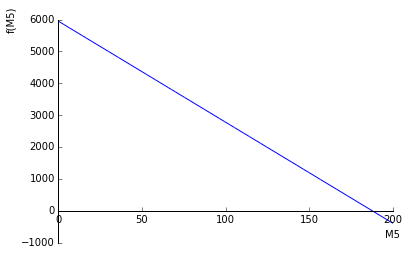

[187.737315875614]


In [10]:
sym.plot(M2.subs(soln),(M5,0,200))
print sym.solve(M2.subs(soln),M5)

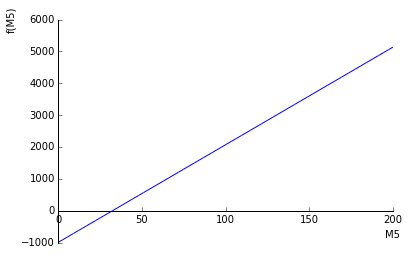

[32.2033898305085]


In [11]:
sym.plot(M3.subs(soln),(M5,0,200))
print sym.solve(M3.subs(soln),M5)

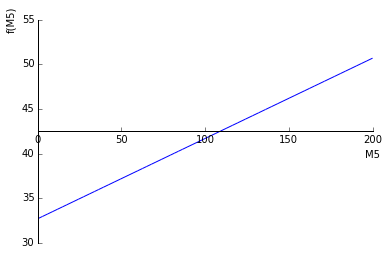

[-363.636363636364]


In [12]:
sym.plot(M4.subs(soln),(M5,0,200))
print sym.solve(M4.subs(soln),M5)

In [13]:
M5_max = sym.solve(M2.subs(soln))[0]
M5_min = sym.solve(M3.subs(soln))[0]

### Finding a Solution to Maximize Revenue

In [14]:
Revenue = 21.48*M2.subs(soln)/100.0 \
          + 16.01*M3.subs(soln)/100.0 \
          + 1.95*M4.subs(soln) \
          + 1.77*M5

print Revenue

0.0362294018424814*M5 + 1184.67735824575


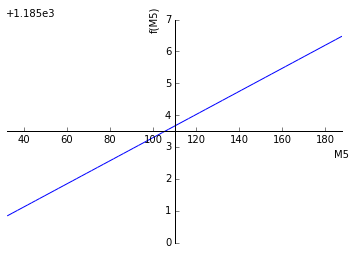

In [15]:
sym.plot(Revenue,(M5,M5_min,M5_max))

In [16]:
opt = [sym.Eq(M5_min,M5)]

soln = sym.solve(mbal + specs + opt)

for m in soln.keys():
    print "{0:2s} : {1:8.1f} lb/hr  {2}".format(m,soln[m], prods[m])

M2 :   4932.2 lb/hr  Regular Milk Product
M1 :   5000.0 lb/hr  Raw Milk
M4 :     35.6 lb/hr  Nonfat Dry Milk Product
M3 :      0.0 lb/hr  Skim Milk Product
M5 :     32.2 lb/hr  Butterfat Product


Revenue and Milk Price Calculations

In [17]:
print "   Maximum Revenue = ${0:8.2f}/hr".format(Revenue.subs(soln))
print "Max Raw Milk Price = ${0:8.2f}/lb".format(Revenue.subs(soln)/5000.0)

   Maximum Revenue = $ 1185.84/hr
Max Raw Milk Price = $    0.24/lb
